# TP4

## Constantes et modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib inline

## FTCS et l’équation d’onde

### Question 3

On veut caractériser les oscillations d'une corde de piano de longueur $L$ fixée aux deux bouts. La corde est frappée par un marteau à une distance $d$ d'une de ses extrémités. La situation est représentée à la figure $\textcolor{red}{\text{N}}$.

<center><img src="Q3_schéma.JPG" style="width: 600px;"/></center>
<center>Figure N. AJOUTER LE TITRE ET LA REF AUX CONSIGNES

$$\textcolor{red}{\text{AJOUTER LA REF ET LE TITER ET LE NO DE FIGURE}}$$

On sait que le comportement de la corde tendue respecte l'équation d'onde en une dimension. L'équation d'onde à une dimension correspond à :
$$\frac{\partial^2\phi}{\partial t^2} = v^2\frac{\partial^2\phi}{\partial x^2}$$
On doit adapter cette équation afin de pouvoir la résoudre numériquement. Pour ce faire, on divise la corde en $N$ petits intervalles de longueur $a$. La dérivée par rapport à $x$ peut alors être approximée par une forme discrète :
$$\frac{\partial^2\phi}{\partial x^2} = \frac{1}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
En remplaçant dans l'équation d'onde, on obtient l'équation différentielle totale suivante :
$$\frac{\partial^2\phi}{\partial t^2} = \frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
On veut maintenant convertir l'équation différentielle d'ordre 2 en un système de 2 équations différentielles d'ordre 1. En posant le changement de variable $\psi(x,t) = \frac{\text{d}\phi}{\text{d}t}$, on obtient le système d'équations suivant :
$$\psi(x,t) = \frac{\text{d}\phi}{\text{d}t}$$
$$\frac{\text{d}\psi}{\text{d}t} = \frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
En utilisant la méthode d'Euler avec un pas temporel $h$, on obtient les équations FTCS suivantes :
$$\phi(x,t+h) = \phi(x, t) + h\psi(x, t)$$
$$\psi(x, t+h) = \psi(x, t) + h\frac{v^2}{a^2}[\phi(x+a,t) + \phi(x-a, t) - 2\phi(x,t)]$$
On peut maintenant déterminer numériquement le comportement de la corde pour les conditions initiales données dans l'énoncé.  On a donc une corde de longueur $L=1$ m, de diamètre $d=10$ cm, avec $v=100\ \text{ms}^{-1}$. Initialement, on a $\phi(x)=0$ et
$$\psi(x) = C\frac{x(L-x)}{L^2}e^{-\frac{(x-d)^2}{2\sigma^2}}$$
où $C=1\ \text{ms}^{-1}$ et $\sigma = 0,3$ m.

On code la fonction *corde_FTCS*. Cette fonction prend en argument les *arrays* *phi_0* [m] et *psi_0* [m/s], qui correspondent respectivement aux conditions initiales $\phi(x)$ et $\psi(x)$, ainsi que la longueur *L* [m] de la corde, le nombre *N* de tranches spatiales, la valeur finale de temps *t_f* [s] qui nous intéresse, le nombre *N_t* de tranches temporelles et la valeur du paramètre *v* [$\text{s}^{-1}$]. La fonction détermine d'abord la valeur des pas temporel *h* et spatial *a* à partir des valeurs de *L*, *N*, *t_f* et *N_t*. La fonction utilise ensuite les équations FTCS déterminées plus haut afin de calculer de manière itérative les valeurs de $\phi$ et de $\psi$ pour chaque valeur de temps $t$. Elle retourne ensuite les valeurs de temps *t* dans un *array numpy* à une dimension et les valeurs de *phi* et de *psi* séparément dans deux *arrays numpy* à 2 dimensions où chaque ligne représente un incrément de temps.

In [2]:
# Méthode FTCS pour déterminer le comportement de la corde
# Arguments:
# phi_0 : array 1D des valeurs initiales de phi [m]
# psi_0 : array 1D des valeurs initiales de psi [m/s]
# L : longueur de la corde [m]
# N : nombre de divisions en x [-]
# t_f : valeur maximale de temps [s]
# N_t : nombre de divisions en t [-]
# v : valeur du paramètre v [s^(-1)]
# Retourne :
# t : array numpy 1D représentant les valeurs de temps [s]
# phi : array numpy 2D des valeurs de phi ou chaque rangée est associée 
#       à une valeur de temps et chaque colonne à une position [m]
# psi : array numpy 2D des valeurs de psi ou chaque rangée est associée 
#       à une valeur de temps et chaque colonne à une position [m/s]

def corde_FTCS(phi_0, psi_0, L, N, t_f, N_t, v):
    # pas temporel et spatial
    h = t_f / N_t
    a = L / N
    
    # variables indépendantes
    t = np.linspace(0, t_f, N_t)
    x = np.linspace(0, L, N)

    # valeurs initiales en listes
    phi = [list(phi_0)]
    psi = [list(psi_0)]

    # processus itératif en listes (zéro au début et à la fin pour les bouts fixes)
    for i in range(len(t)):
        psi_i = [0]
        phi_i = [0]
        for j in range(len(x))[1:-1]:
            phi_j = phi[i][j] + h*psi[i][j]
            psi_j = psi[i][j] + h*v**2/a**2 * (phi[i][j+1] + phi[i][j-1] - 2*phi[i][j])
            phi_i.append(phi_j)
            psi_i.append(psi_j)
        phi_i.append(0)
        psi_i.append(0)
        phi.append(phi_i)
        psi.append(psi_i)
    
    # conversion en array
    return t, np.array(phi), np.array(psi)

On peut maintenant déterminer le comportement de la corde de $t=0$ à $t=100$ ms pour les valeurs de paramètres et les valeurs initiales données.

In [3]:
# données
L = 1
N = 100
t_f = 0.1
h = 10**(-6)
N_t = int(t_f / h)
C = 1
d = 0.1
sigma = 0.3
v = 100

# conditions initiales
init_phi = np.zeros(N)
x = np.linspace(0, L, N)
init_psi = C*x*(L-x) / L**2 * np.exp(-(x-d)**2 / (2*sigma**2))

t, phi, psi = corde_FTCS(init_phi, init_psi, L, N, t_f, N_t, v)

On représente graphiquement la position de la corde au temps $t=100$ ms.

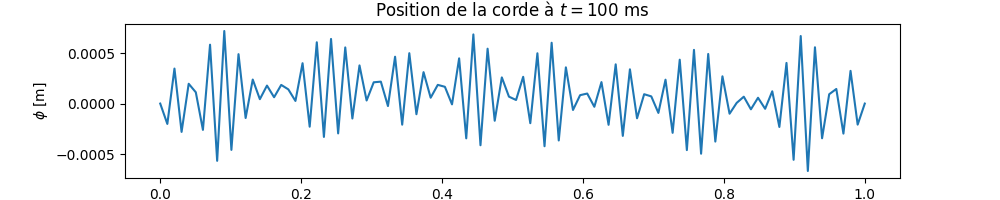

In [4]:
# représentation graphique à t=0.1
fig1 = plt.figure(figsize=(10, 2))
fig1.patch.set_facecolor('white')
plt.xlabel('$x$ [m]')
plt.ylabel('$\phi$ [m]')
plt.plot(x, phi[-1])
plt.title("Position de la corde à $t=100$ ms")
plt.show()

Ce résultat, qui ne correspond pas à ce à quoi on s'attend physiquement, semble indiquer que la solution donnée par la méthode FTCS s'éloigne de la solution physique lorsque le temps avance. On pourra mieux observer ce comportement à la question 4 grâce à une animation.

### Question 4

On veut maintenant observer le comportement de la corde dans l'intervalle de temps. Pour ce faire, on veut représenter les résultats obtenus à la question 3 dans une animation. Pour ce faire, on utilise la fonction *FuncAnimation* du module *matplotlib.animation*. À FINIR APRÈS AVOIR FAIT MARCHER TOUT ÇA

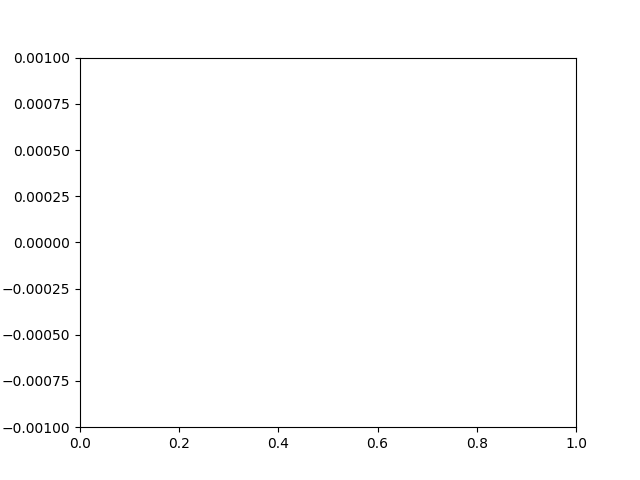

In [7]:
# création de la figure et la ligne qui contiendra les données
fig2 = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(-0.001, 0.001))
line, = ax.plot([], [], lw=2)

# 1 frame pour 50 itérations temporelles
phi_anim = phi[::50]
psi_anim = psi[::50]

# fonction d'initialisation
def fonc_init():
    line.set_data([], [])
    return line,

# fonction d'animation
def anim(i):
    x = np.linspace(0, 1, 100)
    y = phi_anim[i]
    line.set_data(x, y)
    return line,

# animation
corde = FuncAnimation(fig2, anim, init_func=fonc_init, frames=100, interval=20, repeat=False)
plt.show()